In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [12]:
# reading csv
btc_df = pd.read_csv('yahoo_BTC-USD.csv')
btc_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2444,2021-05-27,39316.890625,40379.617188,37247.902344,38436.968750,38436.968750,4.321097e+10
2445,2021-05-28,38507.082031,38856.968750,34779.039063,35697.605469,35697.605469,5.520019e+10
2446,2021-05-29,35684.156250,37234.500000,33693.929688,34616.066406,34616.066406,4.523101e+10
2447,2021-05-30,34607.406250,36400.667969,33520.738281,35678.128906,35678.128906,3.164608e+10


In [13]:
# checking if close is not equal to adj close
btc_df[btc_df['Close']!=btc_df['Adj Close']]

,Date,Open,High,Low,Close,Adj Close,Volume
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# checking for nulls
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2449 entries, 0 to 2448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2449 non-null   object 
 1   Open       2445 non-null   float64
 2   High       2445 non-null   float64
 3   Low        2445 non-null   float64
 4   Close      2445 non-null   float64
 5   Adj Close  2445 non-null   float64
 6   Volume     2445 non-null   float64
dtypes: float64(6), object(1)
memory usage: 134.1+ KB


In [23]:
# train test split
prediction_days = 7
#btc_close = btc_df['Close']
df_train = btc_df[:len(btc_df) - prediction_days]
df_test = btc_df[-prediction_days:]

In [65]:
# process
training_set = np.reshape(df_train['Close'].values, (len(df_train), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [66]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
489/489 [==============================] - 1s 642us/step - loss: nan
Epoch 2/100
489/489 [==============================] - 0s 630us/step - loss: nan
Epoch 3/100
489/489 [==============================] - 0s 670us/step - loss: nan
Epoch 4/100
489/489 [==============================] - 0s 644us/step - loss: nan
Epoch 5/100
489/489 [==============================] - 0s 643us/step - loss: nan
Epoch 6/100
489/489 [==============================] - 0s 642us/step - loss: nan
Epoch 7/100
489/489 [==============================] - 0s 645us/step - loss: nan
Epoch 8/100
489/489 [==============================] - 0s 642us/step - loss: nan
Epoch 9/100
489/489 [==============================] - 0s 647us/step - loss: nan
Epoch 10/100
489/489 [==============================] - 0s 641us/step - loss: nan
Epoch 11/100
489/489 [==============================] - 0s 645us/step - loss: nan
Epoch 12/100
489/489 [==============================] - 0s 643us/step - loss: nan
Epoch 13/100
489/489 [===

KeyboardInterrupt: 

In [55]:
# making the predictions
test_set = df_test['Close'].values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

In [61]:
regressor

KeyError: 'date'

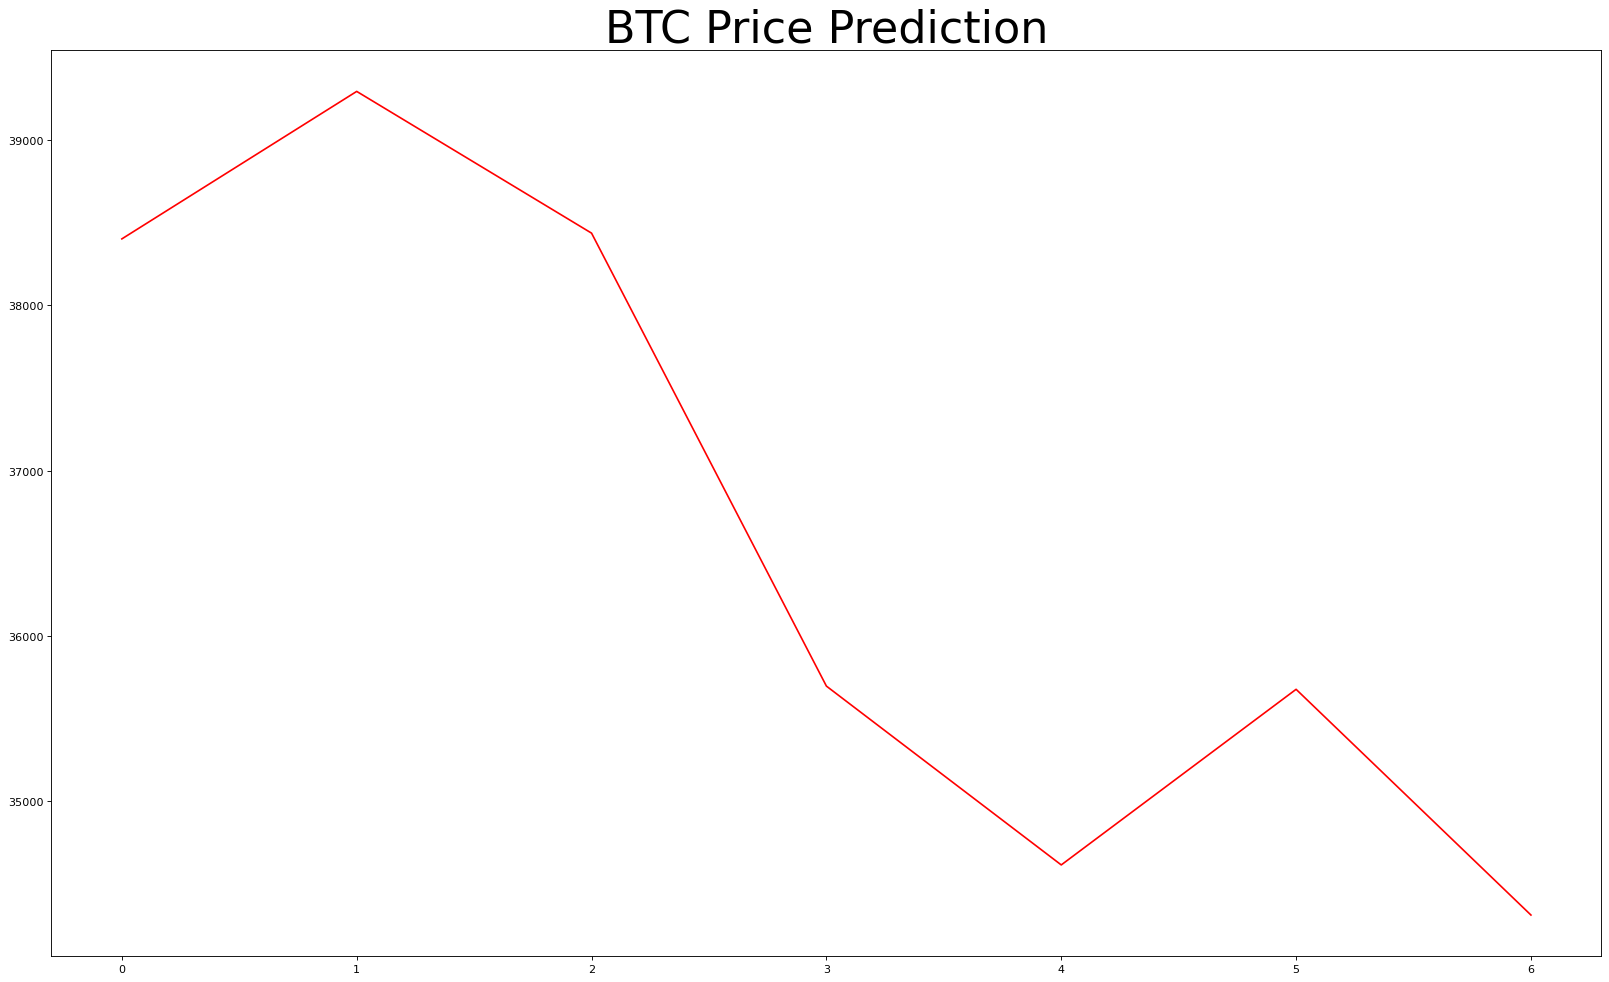

In [57]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()


In [56]:
# https://www.kaggle.com/microtang/predicting-btc-price-using-rnn